In [4]:
from analysis.get_dataframe_from_results import get_pandas_dataset
from analysis.dataset_graphs import plot_graphs_of_dataset_loc
from analysis.get_tables_results import create_table_cleaned
from analysis.get_results import bar_chart_cleaned,bar_chart_fix_position_cleaned
from analysis.get_results import sucess_vs_position_cleaned, get_latex_table_with_verif_stats
from analysis.get_results import compute_stats_tests

import utils.global_variables as gl
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [5]:
RESULT_DIR = gl.BASE_PATH / "results/dafny_llm_results_rq2__loc_strategy"
DATASET_DIR = gl.DAFNY_ASSERTION_DATASET

print(DATASET_DIR)
print(RESULT_DIR)
verif_data_pd = get_pandas_dataset(DATASET_DIR, RESULT_DIR)
verif_data_pd  = verif_data_pd.assign(success=lambda d: d['verif_sucess'] > 0) 

/home/ricostynha/Desktop/daisy/dataset/dafny_assertion_dataset
/home/ricostynha/Desktop/daisy/results/dafny_llm_results_rq2__loc_strategy


<>:17: SyntaxWarning: "\e" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\e"? A raw string is also an option.
<>:17: SyntaxWarning: "\e" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\e"? A raw string is also an option.
/tmp/ipykernel_77751/1952504004.py:17: SyntaxWarning: "\e" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\e"? A raw string is also an option.
  info = get_latex_table_with_verif_stats(verif_data_pd, "Verification success rate for each approach for each category of benchmarks for the position retrieval strategy without examples (\enoex).", "tbl:assertion-inference-verification-position", test_models)



\begin{table}[!t]
\begin{center}
\small
\caption{Verification success rate for each approach for each category of benchmarks for the position retrieval strategy without examples (\enoex).}
\label{tbl:assertion-inference-verification-position}
\begin{tabular}{|l|c|c|c|c|}
\hline
\multirow{2}{*}{Approach} & \multicolumn{4}{c|}{Benchmarks} \\
\cline{2-5}
 & w/o-1 (236) & w/o-2 (184) & All (28) & Combined (448) \\
\hline
LLM$_{fl}$ & \phantom{0}84 (35.0\%) & \phantom{0}13 (\phantom{0}7.0\%) & \phantom{00}0 (\phantom{0}0.0\%) & 97 (21.7\%) \\
LLMEX$_{fl}$ & \phantom{0}93 (39.0\%) & \phantom{0}14 (\phantom{0}7.0\%) & \phantom{00}3 (10.0\%) & 110 (24.6\%) \\
Laurel$_{fl}$ & 110 (46.0\%) & \phantom{00}8 (\phantom{0}4.0\%) & \phantom{00}1 (\phantom{0}3.0\%) & 119 (26.6\%) \\
Laurel$_{fl+}$ & 116 (49.0\%) & \phantom{0}10 (\phantom{0}5.0\%) & \phantom{00}4 (14.0\%) & 130 (29.0\%) \\
Hybrid$_{fl}$ & 115 (48.0\%) & \phantom{0}13 (\phantom{0}7.0\%) & \phantom{00}5 (17.0\%) & 133 (29.7\%) \\
GrTru$_

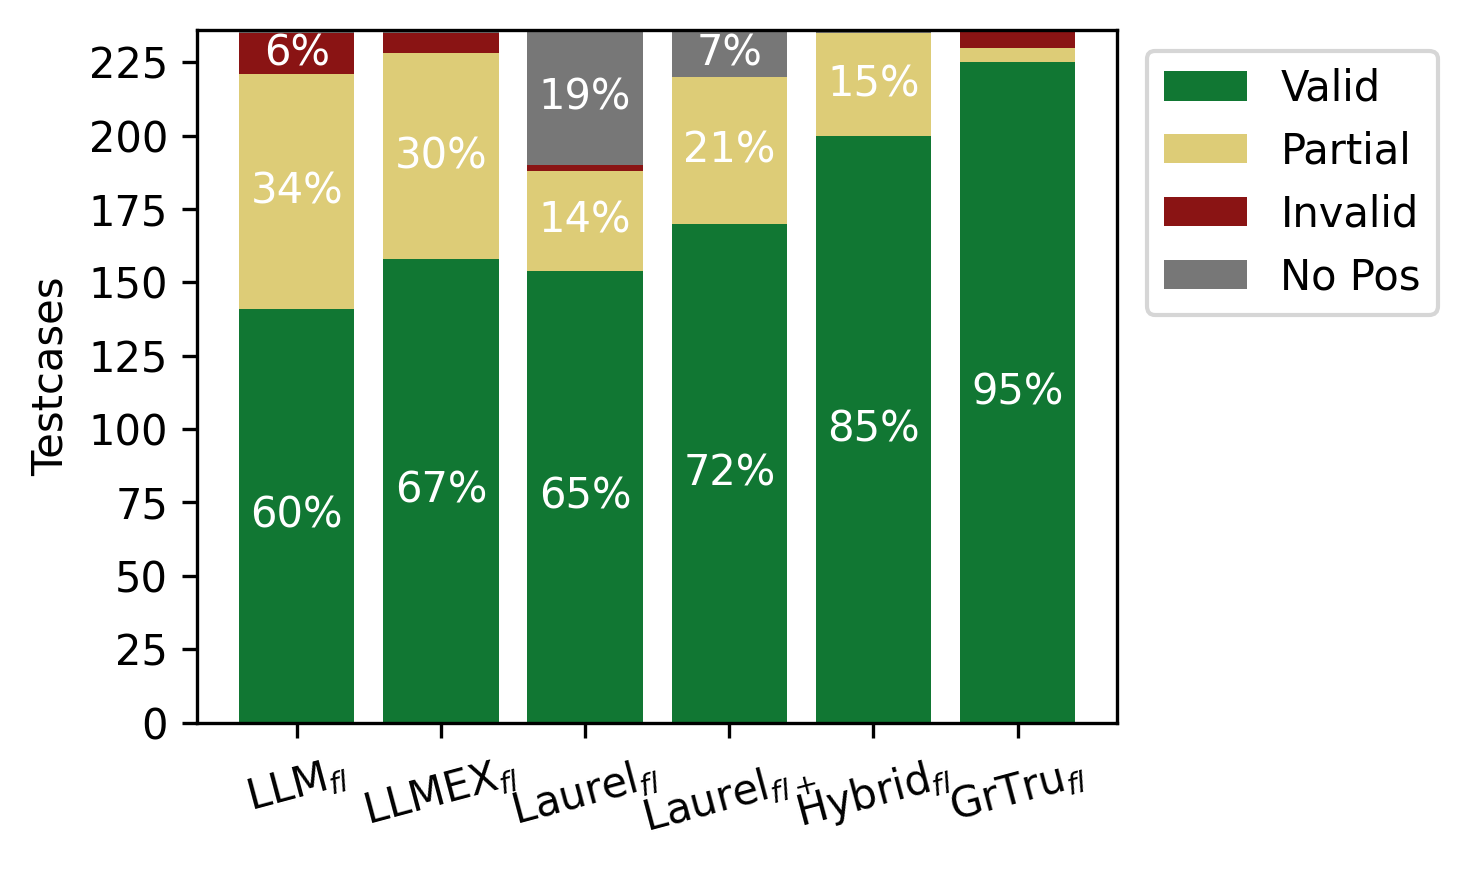

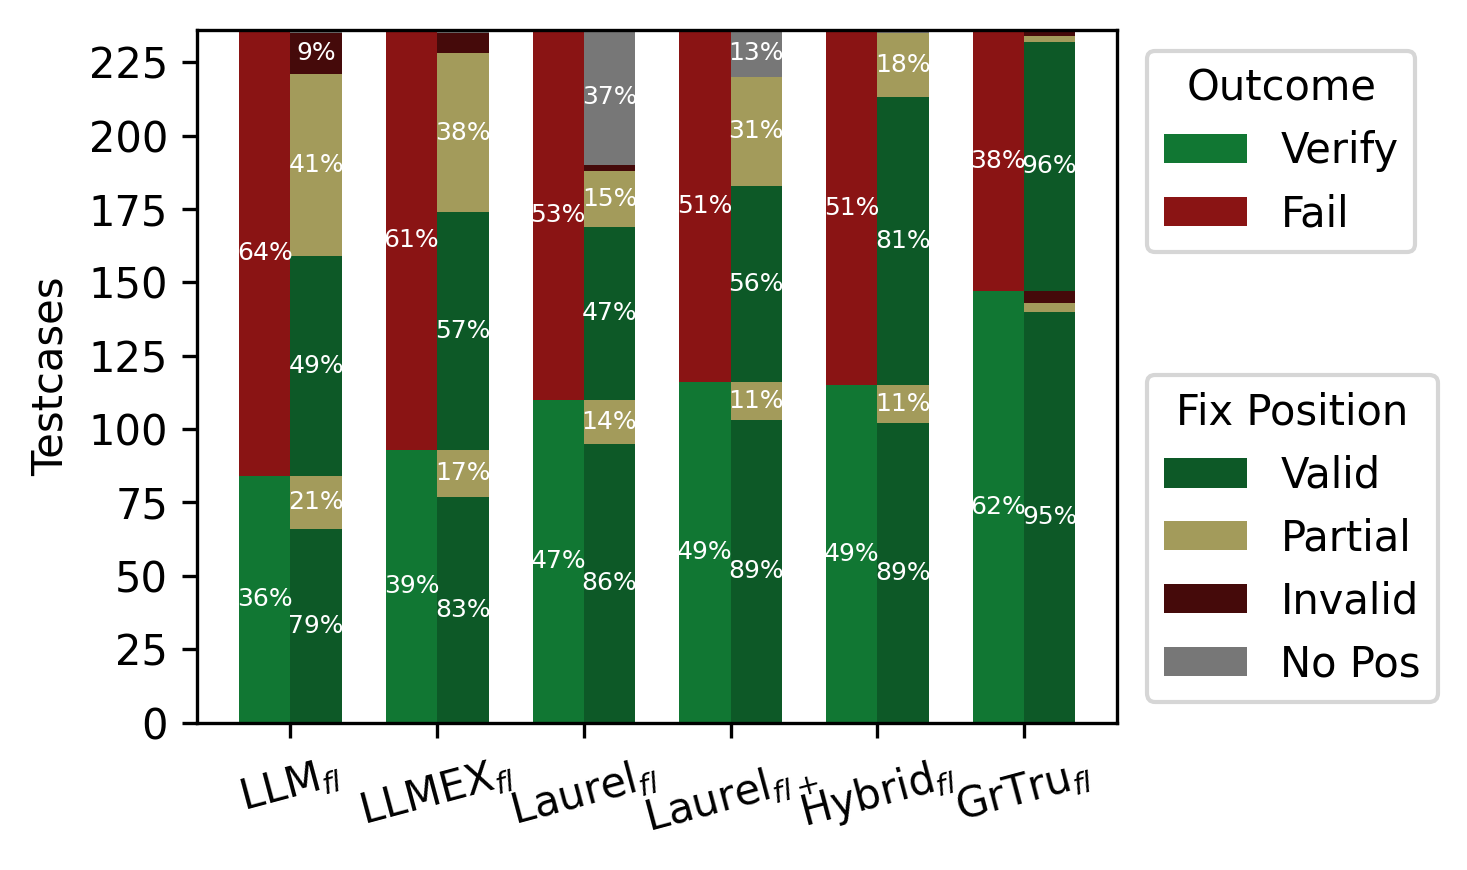

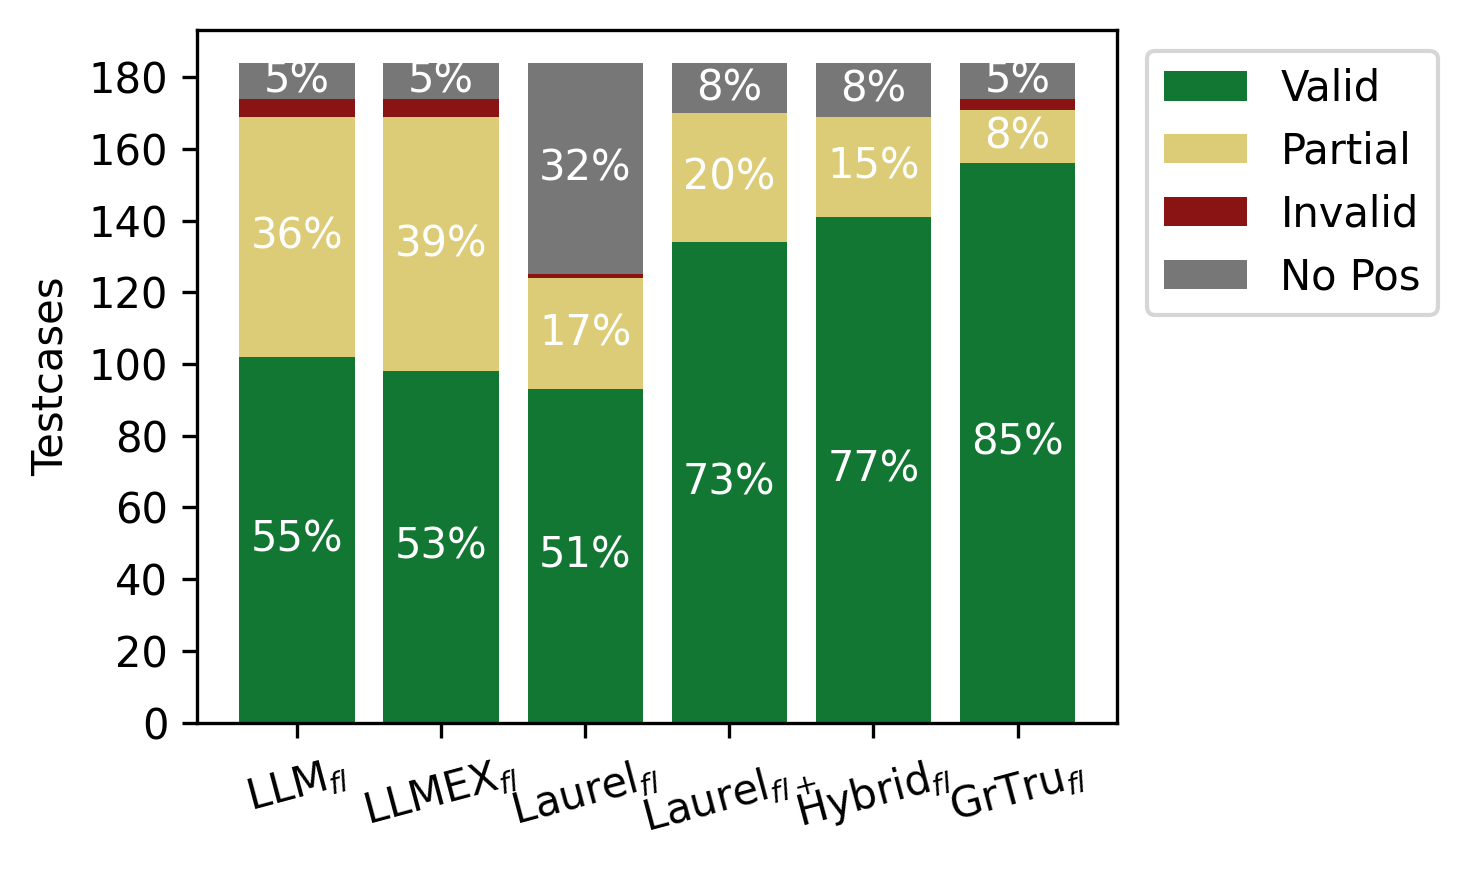

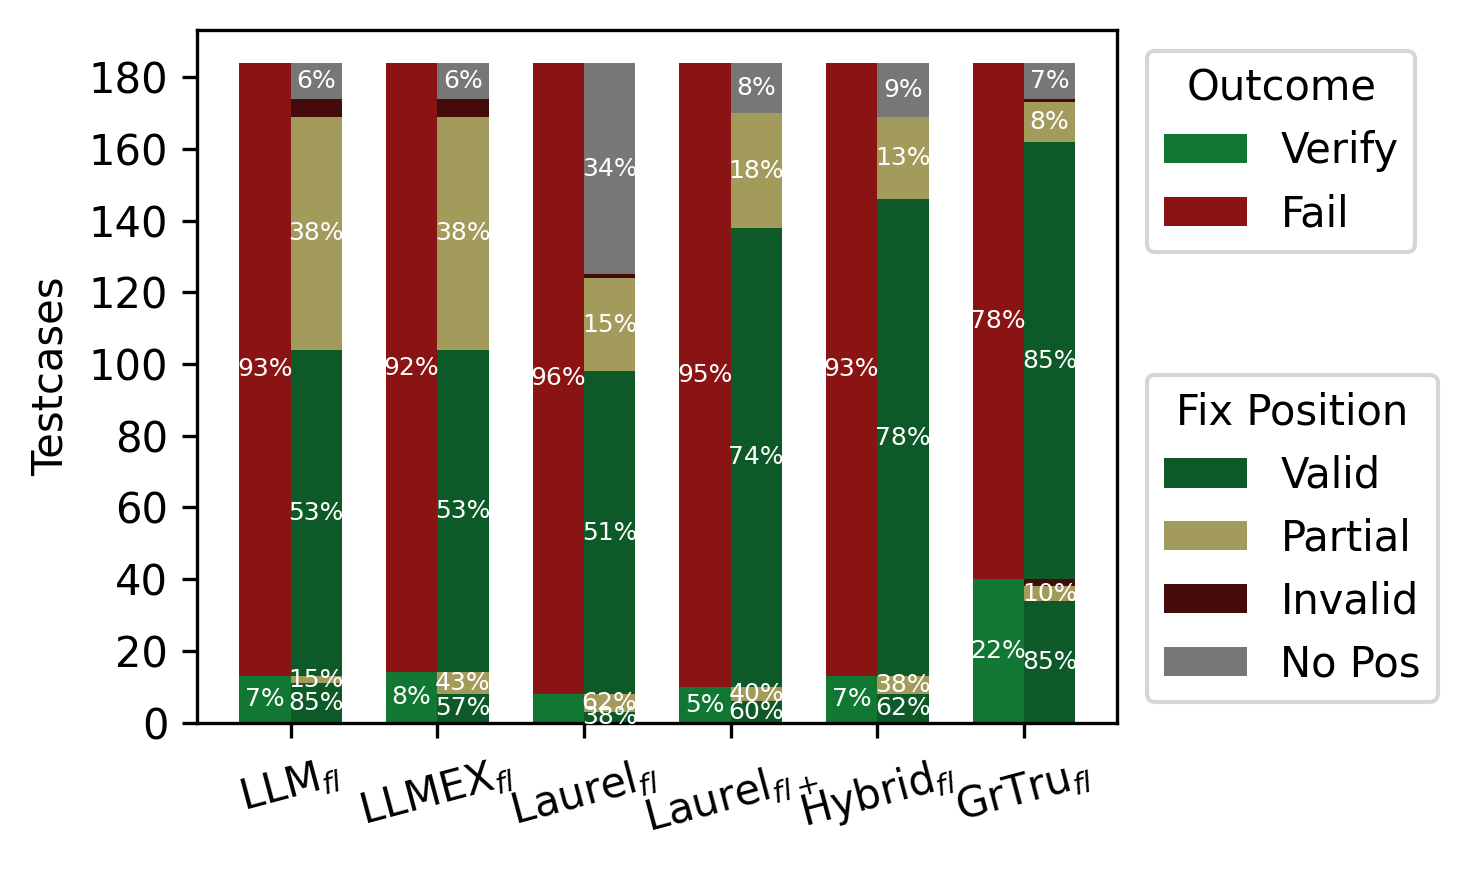

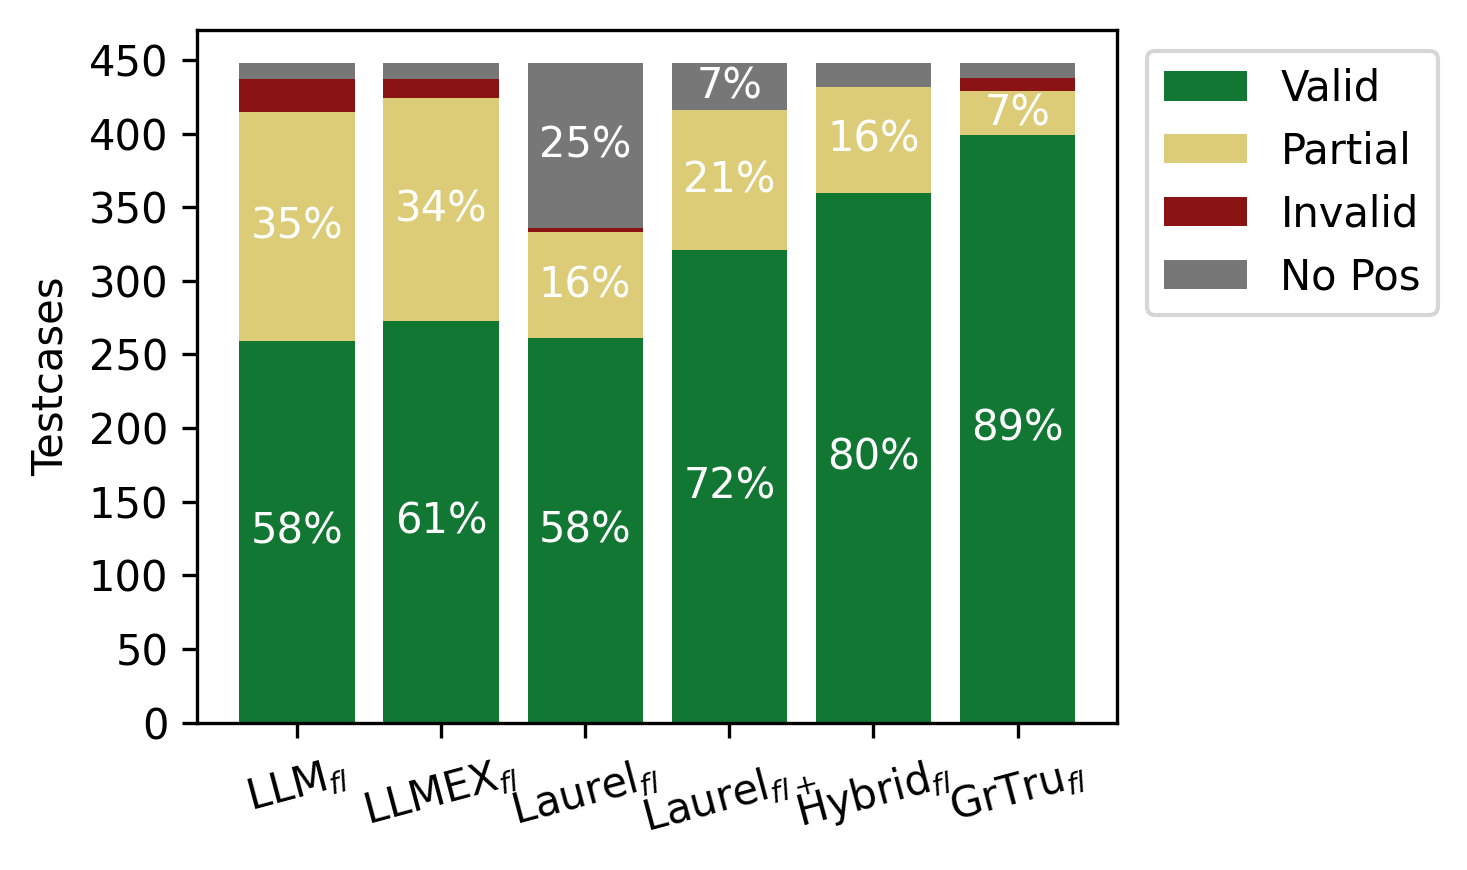

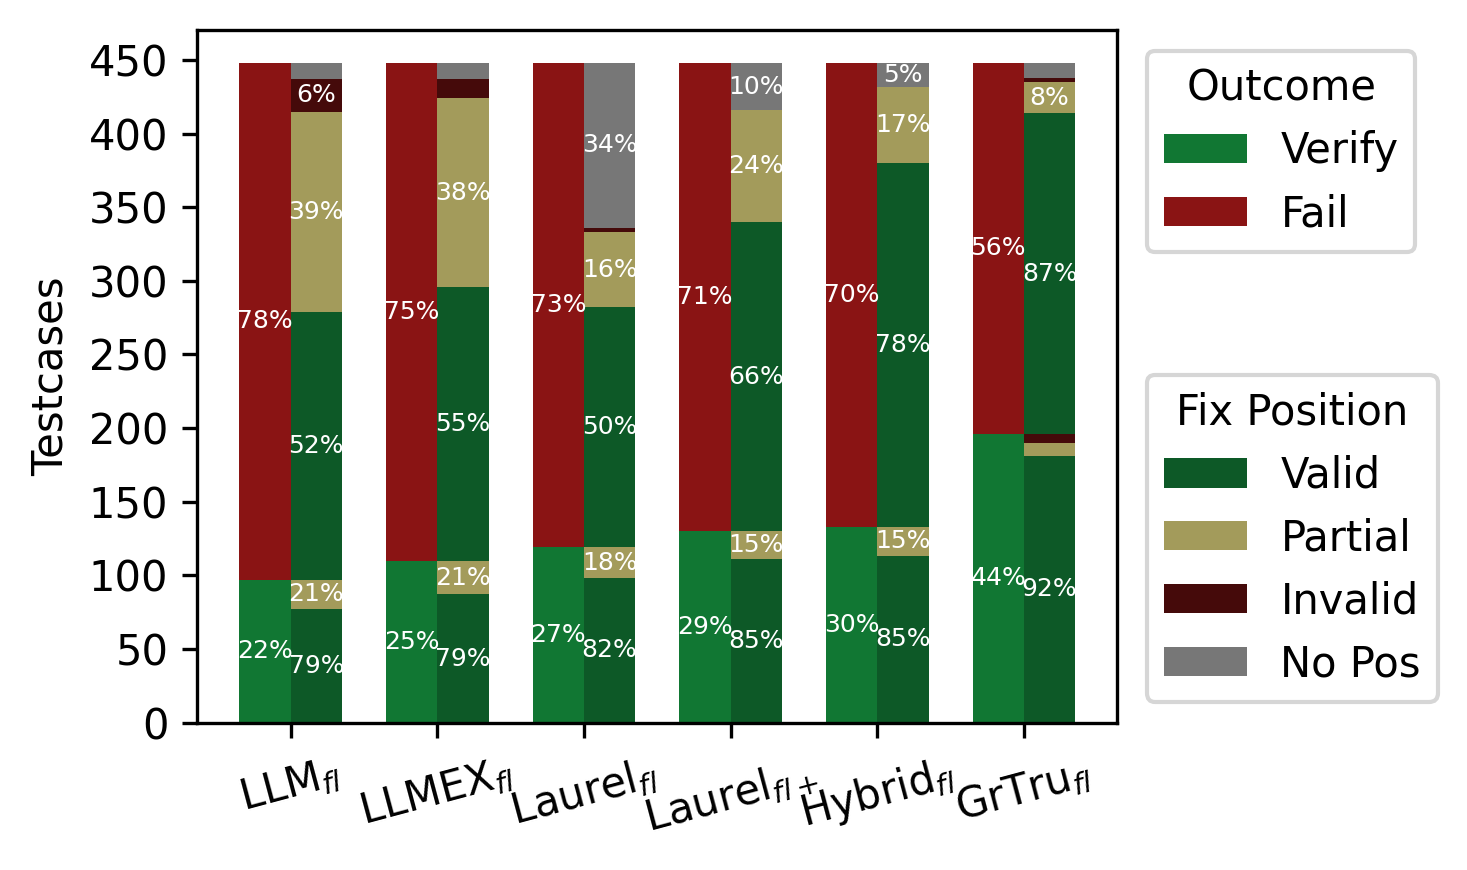

In [6]:
# Graphs of position evaluation
test_models ={ 
"new_prompt_claude-haiku-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_ExType_ExampleStrategies.NONE_loc_LocStrategies.LLM" : "LLM$_{fl}$",
"new_prompt_laude-haiku-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_addExamp_0_alpha_0.5_ExType_ExampleStrategies.NONE_loc_LocStrategies.LLM_EXAMPLE" : "LLMEX$_{fl}$",
"claude-haiku-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_ExType_ExampleStrategies.NONE_loc_LocStrategies.LAUREL" : "Laurel$_{fl}$",
"claude-haiku-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_ExType_ExampleStrategies.NONE_loc_LocStrategies.LAUREL_BETTER" : "Laurel$_{fl+}$",
"new_prompt_claude-haiku-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_addExamp_0_alpha_0.5_ExType_ExampleStrategies.NONE_loc_LocStrategies.HYBRID" : "Hybrid$_{fl}$",
"claude-haiku-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_ExType_ExampleStrategies.NONE_loc_LocStrategies.ORACLE" : "GrTru$_{fl}$"
}

w1d = verif_data_pd[verif_data_pd["benchmark"] == "w/o-1"]
w2d =  verif_data_pd[verif_data_pd["benchmark"] == "w/o-2"]
#verif_data_pd = verif_data_pd[verif_data_pd["benchmark"] != "w/o-1"]

images_p = gl.BASE_PATH / "images"

info = get_latex_table_with_verif_stats(verif_data_pd, "Verification success rate for each approach for each category of benchmarks for the position retrieval strategy without examples (\enoex).", "tbl:assertion-inference-verification-position", test_models)
print(info)

bar_chart_fix_position_cleaned(w1d ,"DOUBLE",   test_models, images_p / "rq2__bar_chart_pos_w1d.pdf")
sucess_vs_position_cleaned(w1d ,"DOUBLE",   test_models, images_p / "rq2__sucess_vs_bar_chart_w1d.pdf")

bar_chart_fix_position_cleaned(w2d ,"DOUBLE",   test_models, images_p / "rq2__bar_chart_pos_w2d.pdf")
sucess_vs_position_cleaned(w2d ,"DOUBLE",   test_models, images_p / "rq2__sucess_vs_bar_chart_w2d.pdf")

bar_chart_fix_position_cleaned(verif_data_pd ,"DOUBLE",   test_models, images_p / "rq2__bar_chart_pos_combined.pdf")
sucess_vs_position_cleaned(verif_data_pd ,"DOUBLE",   test_models, images_p / "rq2__sucess_vs_bar_chart_combined.pdf")


In [4]:
verif_renamed = verif_data_pd.copy()
verif_renamed["llm"] = verif_renamed["llm"].map(test_models)

print("##### Comparing LLM$_{fl}$ with LLMEX$_{fl}$ #####")
compute_stats_tests("LLM$_{fl}$","LLMEX$_{fl}$", verif_renamed)

print("##### Comparing Laurel$_{fl}$ with Laurel$_{fl+}$ #####")
compute_stats_tests("Laurel$_{fl}$","Laurel$_{fl+}$", verif_renamed)

print("##### Comparing LLMEX$_{fl}$ with Laurel$_{fl+}$ #####")
compute_stats_tests("LLMEX$_{fl}$","Laurel$_{fl+}$", verif_renamed)

print("##### Comparing LLMEX$_{fl}$ with Hybrid$_{fl}$ #####")
compute_stats_tests("LLMEX$_{fl}$","Hybrid$_{fl}$", verif_renamed)

print("##### Comparing Hybrid$_{fl}$ with Laurel$_{fl+}$ #####")
compute_stats_tests("Hybrid$_{fl}$","Laurel$_{fl+}$", verif_renamed)

##### Comparing LLM$_{fl}$ with LLMEX$_{fl}$ #####

--- McNemar Matrix [[d,c],[b,a]]: ---
[[314, 37], [24, 73]]

--- Results McNemar (is one better than the other) ---
pvalue      0.12373144253809215
statistic   24.0
Agreements (d): LLM$_{fl}$ Failures, LLMEX$_{fl}$ Failure: 314
Agreements (a): LLM$_{fl}$ Success, LLMEX$_{fl}$ Success: 73
Disagreements (b): LLM$_{fl}$ Success, LLMEX$_{fl}$ Failure: 24
Disagreements (c): LLM$_{fl}$ Failure, LLMEX$_{fl}$ Success: 37
P-Value: 0.12373144253809215
!!! Models are not statistically different (they are equal in efficacy) !!!

--- Results Chi-squared Test of Independence are they independent ---
--- Chi-Squared Matrix [[d,c],[b,a]]: ---
[[314, 37], [24, 73]]
--- Chi-Squared Test Results ---
Chi-Squared Statistic: 168.3453
P-Value: 0.0000
Degrees of Freedom: 1
Expected Frequencies (if independent):
[[264.82  86.18]
 [ 73.18  23.82]]
!!! Models are not independent !!!
Effect Sizes
Phi (φ) Coefficient: 0.613
Jaccard Index (Overlap): 0.545
##### Co